In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# --------------------------------------------------------------------
# 📂 공용 라이브러리 로드 (Load Shared Library)
# --------------------------------------------------------------------
try:
    sys.path.append(os.path.abspath('../../01_Shared_Lib'))
    import constants as config
    import barh_plot as hbar
    print(f'📚 Shared Library Loaded: {config.__name__}')
except ImportError:
    print('⚠️ constants.py를 찾을 수 없습니다. (경로 확인 필요)')

# --------------------------------------------------------------------
# 🎨 한글 폰트 및 시각화 설정 (Korean Font & Visualization Settings)
# --------------------------------------------------------------------
if os.name == 'nt': # Windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix': # Mac
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 6)   # 기본 도화지 크기 설정

print('✅ Data Analysis Environment Initialized!')

📚 Shared Library Loaded: constants
✅ Data Analysis Environment Initialized!


In [2]:
df = pd.read_csv('../../00_Common_Data/tbsh_gyeonggi_day_202507_이천시.csv')
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format='%Y%m%d')

df['day'] = df['day'].map(config.DAY_KOR)
df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['age'] = df['age'].map(config.AGE_MAP)

target_cols = ['cty_rgn_no', 'admi_cty_no', 'card_tpbuz_cd', 'card_tpbuz_nm_1', 'card_tpbuz_nm_2', 'sex', 'age', 'day', 'hour']
for col in target_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

print('✅ Data Settings Environment Initialized!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ta_ymd           536716 non-null  datetime64[ns]
 1   cty_rgn_no       536716 non-null  category      
 2   admi_cty_no      536716 non-null  category      
 3   card_tpbuz_cd    536716 non-null  category      
 4   card_tpbuz_nm_1  536716 non-null  category      
 5   card_tpbuz_nm_2  536716 non-null  category      
 6   hour             536716 non-null  category      
 7   sex              536716 non-null  category      
 8   age              536716 non-null  category      
 9   day              536716 non-null  category      
 10  amt              536716 non-null  int64         
 11  cnt              536716 non-null  int64         
dtypes: category(9), datetime64[ns](1), int64(2)
memory usage: 16.9 MB
✅ Data Settings Environment Initialized!


In [3]:
#남녀 관계에서 남자의 결제주도 가설.
food_df = df[df['card_tpbuz_nm_1'] == '음식']
food_df = food_df.groupby(['card_tpbuz_nm_2','sex'],observed=True)['amt'].sum().reset_index()
food_df

Male_food = food_df[food_df['sex']=='M']
Female_food = food_df[food_df['sex']=='F']


C:\Users\owner\AppData\Local\Temp\ipykernel_15240\3277046273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pie_df = pie_df.groupby('sex')['amt'].sum()


([<matplotlib.patches.Wedge at 0x1744f572ba0>,
 [Text(-0.48621806794810757, 0.25708362530664886, 'F\n131억 \n (34.5%)'),
  Text(0.48621815171655963, -0.25708346687667916, 'M\n249억 \n (65.5%)')])

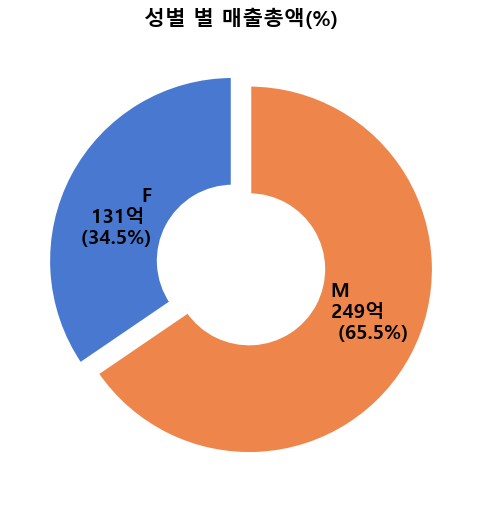

In [ ]:
# 파이 플롯
pie_df = df[df['card_tpbuz_nm_1']=='음식']
pie_df = pie_df.groupby('sex')['amt'].sum()

color = sns.color_palette('muted')
#단위 :억

sentence = []
for i ,(index, value) in enumerate(pie_df.items()):
    pct = (value/pie_df.sum()) * 100
    text = f"{index}\n{value/100000000:.0f}억 \n ({pct:.1f}%)"
    sentence.append(text)

plt.Figure(figsize=(6,4))
plt.title("성별 별 매출총액(%)", fontsize=15, weight='bold')
plt.pie(x=pie_df.values, labels=sentence, autopct=None, startangle=90, colors=color,
         explode=[0.05]*len(pie_df.index), labeldistance=0.5,
           wedgeprops={'width':0.6,'edgecolor': 'w', 'linewidth':3}, textprops={'fontsize':14, 'weight':'bold'})

#매출총액, 매출액평균, 매출건수, 매출건수평균 다 사진따야함.

<Axes: xlabel='amt', ylabel='card_tpbuz_nm_2'>

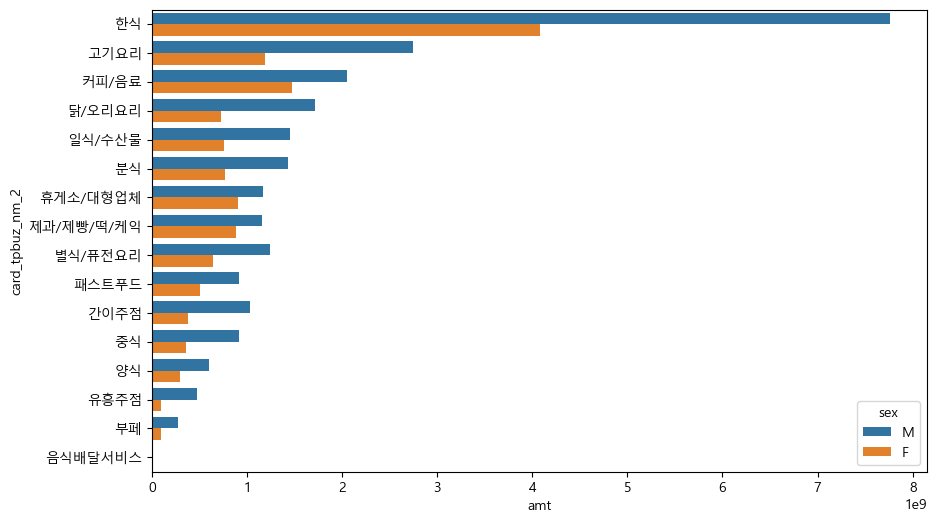

In [36]:
# 바 플롯
data = df[df['card_tpbuz_nm_1'] == '음식']

data = data.groupby(['card_tpbuz_nm_2', 'sex'], observed=True)['amt'].sum().reset_index()

# 정렬기준 만들기
order_data = data.groupby('card_tpbuz_nm_2', observed=True)['amt'].sum().sort_values(ascending=False)
my_order = order_data.index

#좀비처럼 살아있는 뒷 카테고리들
my_odrer = my_order.remove_unused_categories()


sex_order = ['M', 'F']

data['card_tpbuz_nm_2'] = data['card_tpbuz_nm_2'].cat.remove_unused_categories()
#정렬해야함.
#가독성 떨어짐 -> 범주형 떄문이였음.
#데이터 꾸미기
sns.barplot(data=data, x='amt', y='card_tpbuz_nm_2', hue='sex', order=my_order,  hue_order=['M','F'])


#다음엔 막대 위에 막대를 올려 퍼센트로 표시
#갑자기 다시 모든 업종이 나옴. 왜 ? 무엇이 그렇게 만든걸까 ?